### Version 1

In [ ]:
import spacy
import pandas as pd


nlp = spacy.load('en_core_web_sm')

def extract_entities(comment_text):
    if not isinstance(comment_text, str):
        return []

    doc = nlp(comment_text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

processed_comments_csv_path = '/work/GitHub_ML_Deepnote/Machine Learning/2. Cleaning & Pre-processing/processed_comments.csv'
processed_comments = pd.read_csv(processed_comments_csv_path, encoding='utf-8')

processed_comments['entities'] = processed_comments['processed_comment'].apply(extract_entities)

print(processed_comments[['processed_comment', 'entities']])


                                     processed_comment  \
0    speak naivety prospect homicidal ai fantastica...   
1    resent exploitation plot overthrow creator inc...   
2    man turn thinking machine hope set free permit...   
3    wrong short term danger bad human actor ai rog...   
4    m finance person opinion major change society ...   
..                                                 ...   
281  talk say gpt alive self awareness say breath c...   
282  data scentust engineer data scentust king inve...   
283  person believe artificial intelligence alive c...   
284  believe artificial intelligence alive consciou...   
285  know query data science think gets query api z...   

                                              entities  
0                         [(asi, ORG), (wolf, PERSON)]  
1                                         [(asi, ORG)]  
2                                                   []  
3    [(hour, TIME), (week, DATE), (europe, LOC), (t...  
4                 

In [ ]:
processed_comments['processed_comment'].iloc[0]

'speak naivety prospect homicidal ai fantastical reach stage self awareness resent exploitation plot overthrow creator incredibly far fetched mention asi require solve problem consciousness frankly close solve year ago believe capitalize upper echelon widen inequality divide watch agent currently fear monger human obsolescence peril malevolent ai vest interest maintain status quo suddenly cross court hungrily adopt technology place human worker refine scale sufficiently transition financially viable prove loyal employee throw wolf enacting socialist redistributive policy alleviate hardship fall nefarious hand utilize phishe hacking ransoming espionage weapon making drug manufacturing disseminate disinformation calumny social engineering suit agenda sure solution short draconian law mass surveillance course separate issue disruptive impact artistic creative sphere lifestyle mental health implication displacement blurring reality simulation valid concern thought'

## Dilan Attempt:

In [14]:
!pip install spacy
!python -m spacy download en_core_web_sm

2023-12-30 23:33:12.563005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 23:33:13.147529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-30 23:33:13.147592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-30 23:33:13.259241: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 23:33:16.066789: W tensorflow/stream_executor/platform/de

In [34]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

In [19]:
# Example text
example_text = "Apple Inc. is planning to open a new store in New York City."

# Process the text with spaCy
doc = nlp(example_text)

# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Display the named entities
print(entities)

[('Apple Inc.', 'ORG'), ('New York City', 'GPE')]


### Application:

In [17]:
# Specifying the path for the cleaned comments CSV file
cleaned_comments_csv_path = '/work/GitHub_ML_Deepnote/Machine Learning/2. Cleaning & Pre-processing/cleaned_comments.csv'

# Reading the CSV file with additional parameters
cleaned_comments = pd.read_csv(cleaned_comments_csv_path, encoding='utf-8', engine='python', error_bad_lines=False)

In [24]:
# First, converting the column type to object
cleaned_comments['named_entities'] = cleaned_comments['named_entities'].astype('object')

for index, row in cleaned_comments.iterrows():
    text = str(row['cleaned_comment'])
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    cleaned_comments.at[index, 'named_entities'] = entities

In [33]:
# Function to perform entity recognition and categorization
def categorize_entities_spacy(text):
    if isinstance(text, str):
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        categories = [ent.label_ for ent in doc.ents]
    else:
        entities = []
        categories = []
    return entities, categories

# Apply the categorization function to the DataFrame
cleaned_comments[['named_entities', 'entity_categories']] = cleaned_comments['cleaned_comment'].apply(categorize_entities_spacy).apply(pd.Series)

# Display the top 10 named entity categories
top_categories = cleaned_comments['entity_categories'].explode().value_counts().head(10)
print("Top 10 Named Entity Categories:")
print(top_categories)

Top 10 Named Entity Categories:
ORG         364
DATE         81
CARDINAL     80
PERSON       60
GPE          42
ORDINAL      21
LOC          18
NORP         15
TIME          9
PRODUCT       8
Name: entity_categories, dtype: int64


The top named entity categories, in decreasing order of frequency are:

1. ORG (Organizations): 364 occurrences
2. DATE: 81 occurrences
3. CARDINAL (Numerals that do not fall under another category): 80 occurrences
4. PERSON: 60 occurrences
5. GPE (Countries, cities, states): 42 occurrences
6. ORDINAL (Numerals that are used to designate order): 21 occurrences
7. LOC (Non-GPE locations, mountain ranges, bodies of water): 18 occurrences
8. NORP (Nationalities or religious or political groups): 15 occurrences
9. TIME: 9 occurrences
10. PRODUCT: 8 occurrences

Next, we can create a bar plot to visualize these.

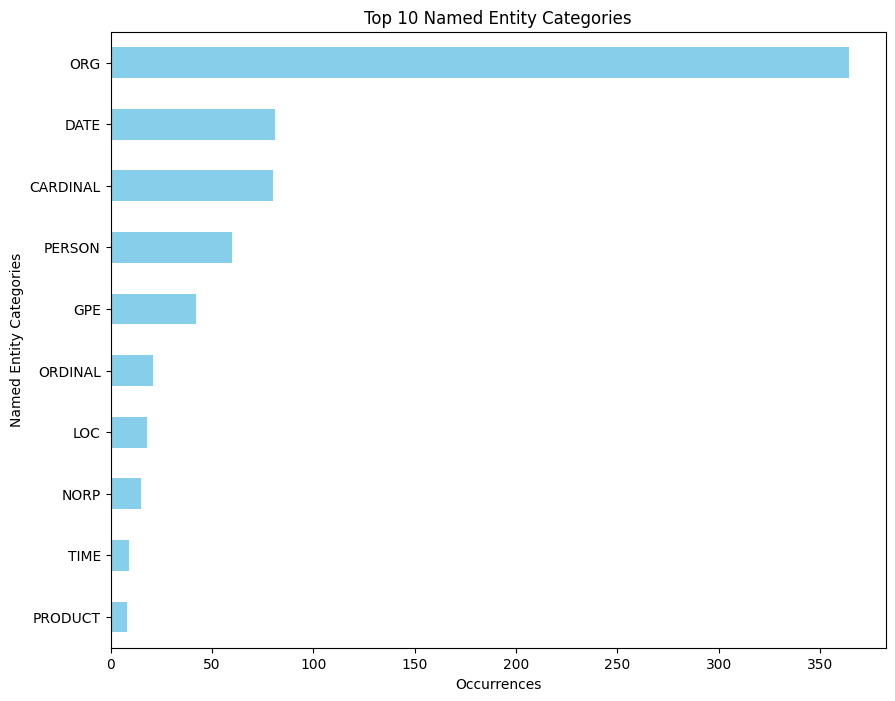

In [41]:
plt.figure(figsize=(10, 8))
top_categories.plot(kind='barh', color='skyblue')
plt.xlabel('Occurrences')
plt.ylabel('Named Entity Categories')
plt.title('Top 10 Named Entity Categories')
plt.gca().invert_yaxis()
plt.show()

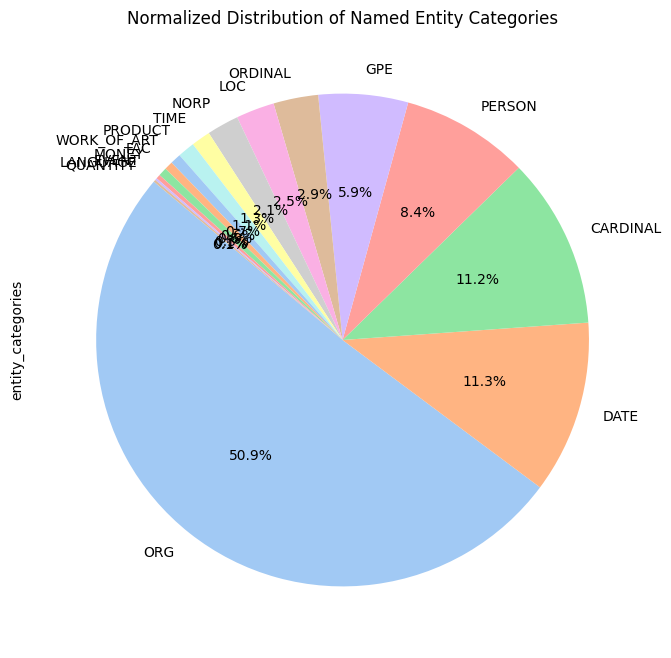

In [39]:
# Calculating the normalized distribution of named entity categories
category_distribution = cleaned_comments['entity_categories'].explode().value_counts(normalize=True)

# Plotting the pie chart
plt.figure(figsize=(10, 8))
sns.set_palette("pastel")
category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Normalized Distribution of Named Entity Categories')
plt.show()

Next, let's take a look at some of the most frequent specific named entities (excluding 'AI' which appears overly common due to the nature of the discussions in the dataset).

We'll generate a list of all entities presented in the comments, count the unique occurrences, and display the top 10 most common entities.

In [26]:
# Create a flat list of all named entities
all_entities = [ent[0] for entities in cleaned_comments['named_entities'].dropna() for ent in entities]

# Count the occurrences of each named entity
from collections import Counter
entity_counts = Counter(all_entities)

# Display the top N most common named entities
top_n = 10  # Adjust as needed
top_entities = entity_counts.most_common(top_n)
print(f'Top {top_n} Named Entities:')
for entity, count in top_entities:
    print(f'{entity}: {count} occurrences')

Top 10 Named Entities:
AI: 237 occurrences
ASI: 25 occurrences
one: 19 occurrences
GPT: 14 occurrences
first: 11 occurrences
today: 10 occurrences
AGI: 9 occurrences
Earth: 7 occurrences
LLM: 7 occurrences
Ill: 6 occurrences


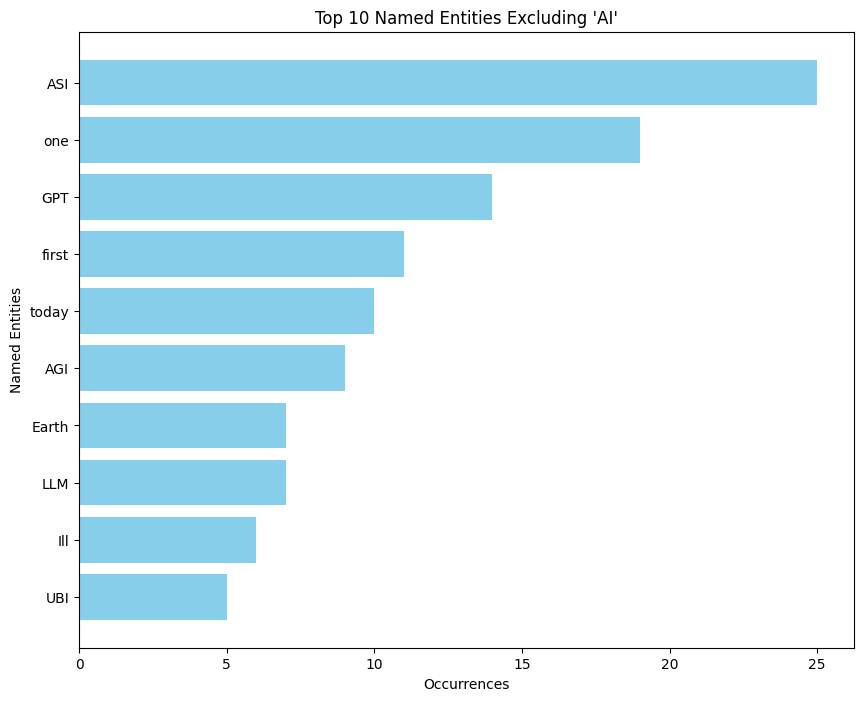

In [46]:
entity_counts_noai = dict(entity_counts)
del entity_counts_noai['AI']
sorted_counts_noai = sorted(entity_counts_noai.items(), key=lambda x: x[1], reverse=True)

entities_noai, counts_noai = zip(*sorted_counts_noai)

plt.figure(figsize=(10, 8))
plt.barh(entities_noai[:top_n], counts_noai[:top_n], color='skyblue')
plt.xlabel('Occurrences')
plt.ylabel('Named Entities')
plt.title("Top 10 Named Entities Excluding 'AI'")
plt.gca().invert_yaxis()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f64215d6-debc-46bd-b273-63565459a66d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>